In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from skimage import io
from scipy import ndimage as ndi
from skimage import feature
from skimage.filters import gaussian
from skimage.filters import sobel
from skimage.exposure import equalize_hist
from skimage.exposure import equalize_adapthist
from skimage.exposure import rescale_intensity
from skimage.feature import canny
from scipy.ndimage.morphology import binary_fill_holes
from skimage.measure import label
from skimage.measure import regionprops
import pandas as pd

In [2]:
# Replace this with the path to battdeg.py module in your system
sys.path.insert(0, '/Users/shrilakshmisbonageri/Desktop/UW/DIRECT/capstone/musical-robot/musicalrobot')

In [3]:
import irtemp

In [4]:
frames = io.imread('../musicalrobot/data/6_11_19_Proline_MA_flat_plate.tiff')

#### Flipping all the frames horizontally and vertically to correct for the mirroring during recording

In [5]:
flip_frame = []
for frame in frames:    
    f_frame = np.fliplr(frame)
    flip_frame.append(np.flipud(f_frame))

In [6]:
len(frames)

5746

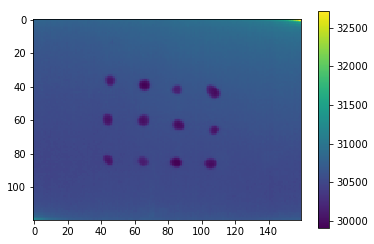

In [7]:
plt.imshow(frames[0])
plt.colorbar()


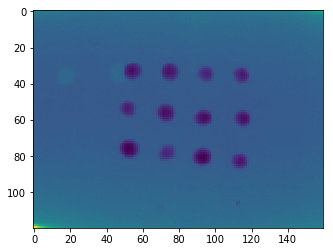

In [8]:
plt.imshow(flip_frame[2000])

In [9]:
edges = feature.canny(flip_frame[0]/2000)


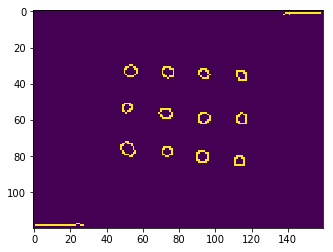

In [10]:
plt.imshow(edges)

In [29]:
from skimage.morphology import remove_small_objects
filled_wells = binary_fill_holes(edges)
cl_wells = remove_small_objects(filled_wells,min_size=28)
labeled_wells = label(cl_wells)

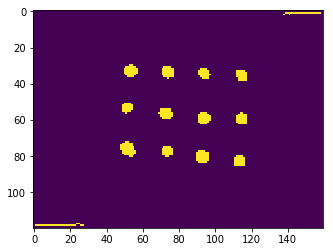

In [30]:
plt.imshow(filled_wells)

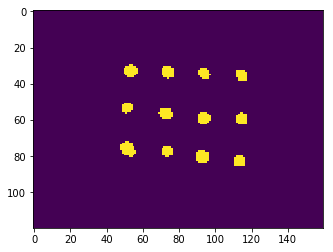

In [31]:
plt.imshow(cl_wells)

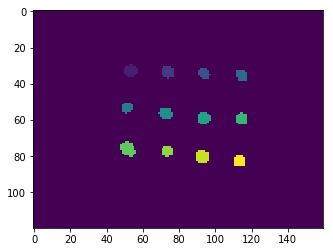

In [32]:
plt.imshow(labeled_wells)

In [33]:
from musicalrobot import edge_detection as ed

In [35]:
regprops = ed.regprop(labeled_wells,flip_frame,12)

In [36]:
regprops[0]

,Row,Column,Plate,Plate_coord,Area,Perim,Mean Intensity
4,53.0,51.0,30575.0,61.0,28.0,17.071068,30036.0
8,76.0,51.0,30653.0,61.0,55.0,26.142136,29993.0
0,33.0,53.0,30524.0,63.0,42.0,21.313708,29986.0
5,56.0,72.0,30581.0,82.0,39.0,21.071068,29999.0
9,77.0,73.0,30629.0,83.0,30.0,17.656854,30148.0
1,33.0,74.0,30532.0,84.0,39.0,21.071068,29920.0
10,80.0,92.0,30614.0,102.0,44.0,21.656854,29935.0
2,34.0,93.0,30509.0,103.0,32.0,18.485281,30115.0
6,59.0,93.0,30567.0,103.0,41.0,20.485281,30046.0
11,82.0,113.0,30595.0,123.0,34.0,18.828427,30075.0


In [37]:
s_temp, plate_temp = ed.sample_temp(regprops,flip_frame)

Text(0, 0.5, 'Temperature of the PPA sample($^\\circ$C)')

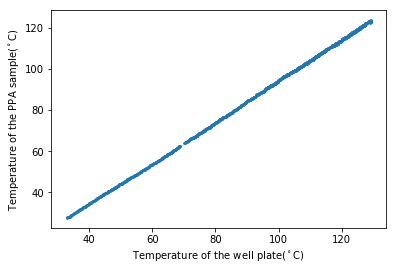

In [38]:
plt.scatter(plate_temp[11],s_temp[11],s=1.5)
plt.xlabel('Temperature of the well plate($^\circ$C)')
plt.ylabel('Temperature of the PPA sample($^\circ$C)')

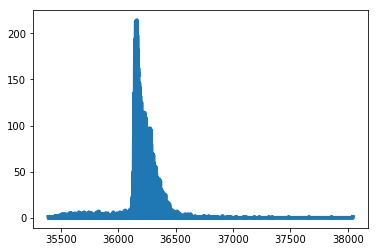

In [25]:
from skimage.exposure import histogram

hist, hist_centers = histogram(frames[2000])
plt.plot(hist_centers, hist, linewidth=4)